**Value at Risk (VaR)** is a statistic that quantifies the possibke extent of the financial losses within a portofolio over a specific period of time. Risk managers use this measure adn control the **level of risk exposure.**

Here, I have calculated the VaR for a portfolio of **10 prominent stocks** from the Indian stock market namely Adani Ports, Bajaj Finance, Cipla, Dabur, ITC, L&T, Reliance, Sunpharma, TCS and Tech Mahindra.

In [3]:
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import norm 

In [5]:
tickers = [ 'LT.NS', 'ITC.NS', 'TCS.NS', 'SUNPHARMA.NS', 'BAJFINANCE.NS', 'CIPLA.NS',
          'TECHM.NS', 'DABUR.NS','RELIANCE.NS', 'ADANIPORTS.NS']
# Providing equal weightage of 10% to all the 10 stocks in the portfolio 
weights = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [10]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()

df = yf.download(tickers, start, end)['Adj Close']
df

[*********************100%***********************]  10 of 10 completed


,ADANIPORTS.NS,BAJFINANCE.NS,CIPLA.NS,DABUR.NS,ITC.NS,LT.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS,TECHM.NS
Date,,,,,,,,,,
2021-01-01,496.902405,5252.506836,818.090271,524.386841,191.089050,1266.267822,1975.180176,578.655396,2800.458252,913.582520
2021-01-04,492.020630,5188.891602,823.682190,533.368774,190.686935,1283.450806,1978.509277,586.564819,2906.805420,936.002930
2021-01-05,492.563080,5092.200195,818.733643,529.000549,188.944504,1275.347534,1953.912720,585.642883,2958.018311,937.777771
2021-01-06,489.949585,5003.964355,816.308838,524.288696,183.538422,1282.864990,1902.384155,587.438354,2918.329346,931.518860
2021-01-07,506.764465,5054.399902,818.040833,525.368530,181.215149,1307.223877,1899.303467,584.138611,2900.445801,929.276794
...,...,...,...,...,...,...,...,...,...,...
2023-04-26,664.700012,6055.950195,911.099976,533.650024,412.250000,2276.149902,2362.100098,971.250000,3198.149902,996.299988
2023-04-27,659.750000,6200.049805,913.950012,530.400024,416.000000,2305.600098,2377.050049,978.700012,3187.949951,1003.150024
2023-04-28,681.299988,6280.100098,908.049988,532.900024,425.549988,2364.399902,2420.500000,987.650024,3219.250000,1023.700012


In [11]:
# Calculation of the daily returns 
returns = df.pct_change()
returns 

,ADANIPORTS.NS,BAJFINANCE.NS,CIPLA.NS,DABUR.NS,ITC.NS,LT.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS,TECHM.NS
Date,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.009824,-0.012111,0.006835,0.017128,-0.002104,0.013570,0.001685,0.013669,0.037975,0.024541
2021-01-05,0.001102,-0.018634,-0.006008,-0.008190,-0.009138,-0.006314,-0.012432,-0.001572,0.017618,0.001896
2021-01-06,-0.005306,-0.017328,-0.002962,-0.008907,-0.028612,0.005894,-0.026372,0.003066,-0.013417,-0.006674
2021-01-07,0.034320,0.010079,0.002122,0.002060,-0.012658,0.018988,-0.001619,-0.005617,-0.006128,-0.002407
...,...,...,...,...,...,...,...,...,...,...
2023-04-26,-0.010053,-0.003177,0.001594,0.013773,0.001701,0.012545,-0.005871,-0.001285,0.006974,-0.000702
2023-04-27,-0.007447,0.023795,0.003128,-0.006090,0.009096,0.012939,0.006329,0.007671,-0.003189,0.006875
2023-04-28,0.032664,0.012911,-0.006456,0.004713,0.022957,0.025503,0.018279,0.009145,0.009818,0.020485


In [13]:
# Calculation of the Variance - Covariance matrix 
cov_matrix = returns.cov()
cov_matrix

,ADANIPORTS.NS,BAJFINANCE.NS,CIPLA.NS,DABUR.NS,ITC.NS,LT.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS,TECHM.NS
ADANIPORTS.NS,0.000725,0.000204,0.000034,0.000078,0.000102,0.000155,0.000155,0.000094,0.000101,0.000138
BAJFINANCE.NS,0.000204,0.000411,0.000007,0.000062,0.000091,0.000139,0.000138,0.000075,0.000082,0.000109
CIPLA.NS,0.000034,0.000007,0.000213,0.000046,0.000018,0.000020,0.000010,0.000086,0.000043,0.000056
DABUR.NS,0.000078,0.000062,0.000046,0.000171,0.000044,0.000056,0.000040,0.000053,0.000054,0.000051
ITC.NS,0.000102,0.000091,0.000018,0.000044,0.000205,0.000072,0.000071,0.000045,0.000037,0.000048
LT.NS,0.000155,0.000139,0.000020,0.000056,0.000072,0.000238,0.000095,0.000073,0.000082,0.000121
RELIANCE.NS,0.000155,0.000138,0.000010,0.000040,0.000071,0.000095,0.000258,0.000046,0.000069,0.000087
SUNPHARMA.NS,0.000094,0.000075,0.000086,0.000053,0.000045,0.000073,0.000046,0.000213,0.000055,0.000085
TCS.NS,0.000101,0.000082,0.000043,0.000054,0.000037,0.000082,0.000069,0.000055,0.000187,0.000150
TECHM.NS,0.000138,0.000109,0.000056,0.000051,0.000048,0.000121,0.000087,0.000085,0.000150,0.000351


In [14]:
# Calculation of Portfolio expected returns  
average_returns = returns.mean()
average_returns


ADANIPORTS.NS    0.000886
BAJFINANCE.NS    0.000487
CIPLA.NS         0.000311
DABUR.NS         0.000130
ITC.NS           0.001500
LT.NS            0.001197
RELIANCE.NS      0.000481
SUNPHARMA.NS     0.000991
TCS.NS           0.000314
TECHM.NS         0.000399
dtype: float64

In [15]:
# Number of observations for each company 
count = returns.count()[0]
count


576

Construction of a Normal Distribution curve using the above results 


In [16]:
portfolio_mean = average_returns @ weights
portfolio_std = np.sqrt (weights.T @ cov_matrix @ weights )
portfolio_mean

0.0006696454365800442

In [17]:
# Calculation of the portfolio standard deviation 
portfolio_std 

0.009960939289843283

Building a Normal Distribution curve using the above parameters 

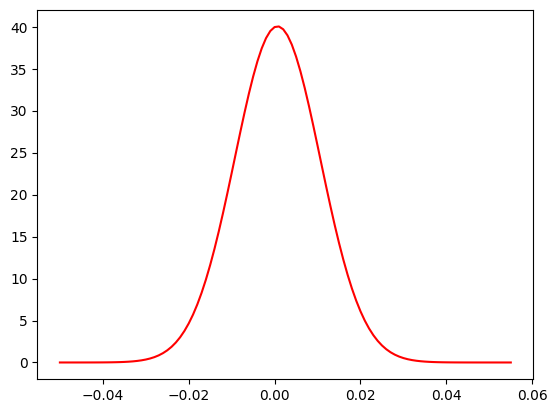

In [23]:
x = np.arange(-0.05, 0.055, 0.001)
norm_dist =  norm.pdf(x ,portfolio_mean, portfolio_std)


plt.plot(x, norm_dist, color = 'red')
plt.show()

Calculation of Value at Risk with 5% confidence level 

In [25]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level, portfolio_mean, portfolio_std)
VaR

-0.01571464168216211

Conclusion: this VaR =1.5% 


States that I have 95% confidence that the portfolio will not face a lose of more trhan 1.5% in a day. 

Lets calculate the confidence interval with the confidence level of 95.5% 

Confidence Interval formula :



 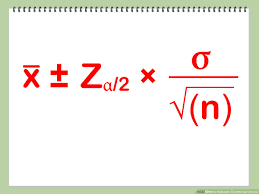

In [26]:
lower = portfolio_mean - 2* portfolio_std / np.sqrt(count)
higher = portfolio_mean + 2* portfolio_std / np.sqrt(count)


In [27]:
lower

-0.00016043283757356276

In [28]:
higher

0.0014997237107336513

**Conclusion:** We are 95.5% confident that the daily returns of the portfolio will be between -0.000160 and 0.001499 